In [ ]:
import  pandas as pd
import numpy as np
import os
from tqdm import  tqdm
from sklearn.preprocessing import  LabelEncoder
import json
from joblib import  Parallel,delayed
from functools import  partial
from matplotlib import  pyplot as plt
import random

In [2]:
path = 'E:\data'
savePath = os.getcwd()
print(f'path is {path} \n savePath is {savePath}')

path is E:\data 
 savePath is E:\hangtong\data


In [3]:
pd.read_pickle('kuai/negative.pkl',compression = 'gzip')

,user,interacted_items,negative_items,test_negative_samples
0,0,"{518, 6151, 525, 2065, 5654, 4634, 4122, 8732,...","{8195, 8200, 8201, 8204, 8207, 8212, 8213, 822...","[3107, 1445, 4166, 5642, 2645, 4211, 804, 867,..."
1,1,"{2052, 9732, 1529, 7187, 4120, 7706, 6173, 719...","{8195, 8200, 8201, 8204, 8207, 8212, 8213, 822...","[573, 10212, 5211, 8486, 9613, 9837, 7306, 967..."
2,2,"{2052, 4100, 262, 2441, 4875, 10382, 6288, 769...","{8195, 8200, 8201, 8204, 8207, 8212, 8213, 822...","[4451, 2533, 8822, 636, 7713, 1437, 7501, 4043..."
3,3,"{520, 2570, 3595, 4123, 2590, 544, 5666, 8228,...","{8195, 8200, 8201, 8204, 8207, 8212, 8213, 822...","[8534, 8643, 9751, 10037, 2411, 3714, 961, 590..."
4,4,"{773, 9101, 4366, 6801, 6930, 10130, 3990, 527...","{8195, 8200, 8201, 8204, 8207, 8212, 8213, 822...","[6219, 146, 5731, 7283, 8598, 2315, 7752, 702,..."
...,...,...,...,...
5760,7171,"{521, 3086, 7695, 7183, 1044, 8730, 2075, 8732...","{8195, 8200, 8201, 8204, 8207, 8212, 8213, 822...","[1896, 7269, 402, 3968, 5228, 2966, 3990, 462,..."
5761,7172,"{5635, 10243, 2052, 9732, 522, 525, 4623, 2065...","{8195, 8200, 8201, 8204, 8207, 8212, 8213, 822...","[4092, 3304, 5265, 7706, 5402, 7328, 3149, 929..."
5762,7173,"{8704, 9092, 6533, 5638, 6151, 10120, 8457, 48...","{8195, 8200, 8201, 8204, 8207, 8212, 8213, 822...","[1288, 2330, 2790, 479, 6103, 10370, 562, 6254..."
5763,7174,"{8323, 4500, 5525, 1305, 7071, 3108, 8366, 990...","{8195, 8200, 8201, 8204, 8207, 8212, 8213, 822...","[669, 9022, 7702, 6776, 6309, 9881, 8578, 2556..."


In [19]:
def plot(train,test,item_size):
    step = 0.01
    x = range(item_size)
    _x = np.arange(np.min(x), np.max(x), step)
    f1 = np.polyfit(x, train, 3)
    p1 = np.poly1d(f1)
    y1 = p1(_x)
    f2 = np.polyfit(x, test, 3)
    p2 = np.poly1d(f2)
    y2 = p2(_x)
    plt.figure(figsize=(14, 12), dpi=300)
    ax = plt.axes()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    plt.xlabel('Items sorted by counts', fontweight = 'bold', fontsize = 35,labelpad = 35,fontproperties='Times New Roman', )
    # plt.ylabel('Number of Interactions',fontweight = 'bold', fontsize = 25,labelpad = 20,fontproperties='Times New Roman', )

    plt.ylabel('Interaction counts',fontweight = 'bold', fontsize = 35,labelpad = 35,fontproperties='Times New Roman', )
    plt.yticks(fontproperties='Times New Roman', size=25)#设置大小及加粗
    plt.xticks(fontproperties='Times New Roman', size=25)
    plt.plot(_x, y1,color = '#63b2ee',label = 'Partially Observed (MNAR)', linewidth  = 8,marker = 'o',markersize = 15,markevery = 15000)
    plt.plot(_x, y2,color = '#76da91',label = 'Full Observed (MNAR)', linewidth  = 8,marker = 's',markersize = 15,markevery = 15000)

    plt.legend(prop={'family':'Times New Roman','size':30},frameon=False)
    plt.savefig("kuai_counts.pdf",dpi=300)
    plt.show()



In [16]:
#kuai
big = pd.read_csv(path + '/KuaiRec/KuaiRec 2.0/data/big_matrix.csv')[['user_id','video_id','watch_ratio']]
big['watch_ratio'].iloc[big['watch_ratio'] < 2.0] = 0
big['watch_ratio'].iloc[big['watch_ratio'] >= 2.0] = 1
# big = big[big['watch_ratio'] > 0]
print(big.shape)
big.head()

(12530806, 3)


C:\Users\PC\AppData\Local\Temp\ipykernel_30108\974543163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big['watch_ratio'].iloc[big['watch_ratio'] >= 2.0] = 1


,user_id,video_id,watch_ratio
0,0,3649,0.0
1,0,9598,0.0
2,0,5262,0.0
3,0,1963,0.0
4,0,8234,0.0


In [12]:
big = big[big['watch_ratio'] > 0]
print(big.shape)
print(big.video_id.max(),big.video_id.min())

(936568, 3)
10727 0


In [17]:
small = pd.read_csv(path + '/KuaiRec/KuaiRec 2.0/data/small_matrix.csv')[['user_id','video_id','watch_ratio']]
small['watch_ratio'].iloc[small['watch_ratio'] < 2.0] = 0
small['watch_ratio'].iloc[small['watch_ratio'] >= 2.0] = 1
print(small.shape)
small.head()

(4676570, 3)


C:\Users\PC\AppData\Local\Temp\ipykernel_30108\1418866489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['watch_ratio'].iloc[small['watch_ratio'] >= 2.0] = 1


,user_id,video_id,watch_ratio
0,14,148,0.0
1,14,183,0.0
2,14,3649,1.0
3,14,5262,0.0
4,14,8234,0.0


(10272525, 3)


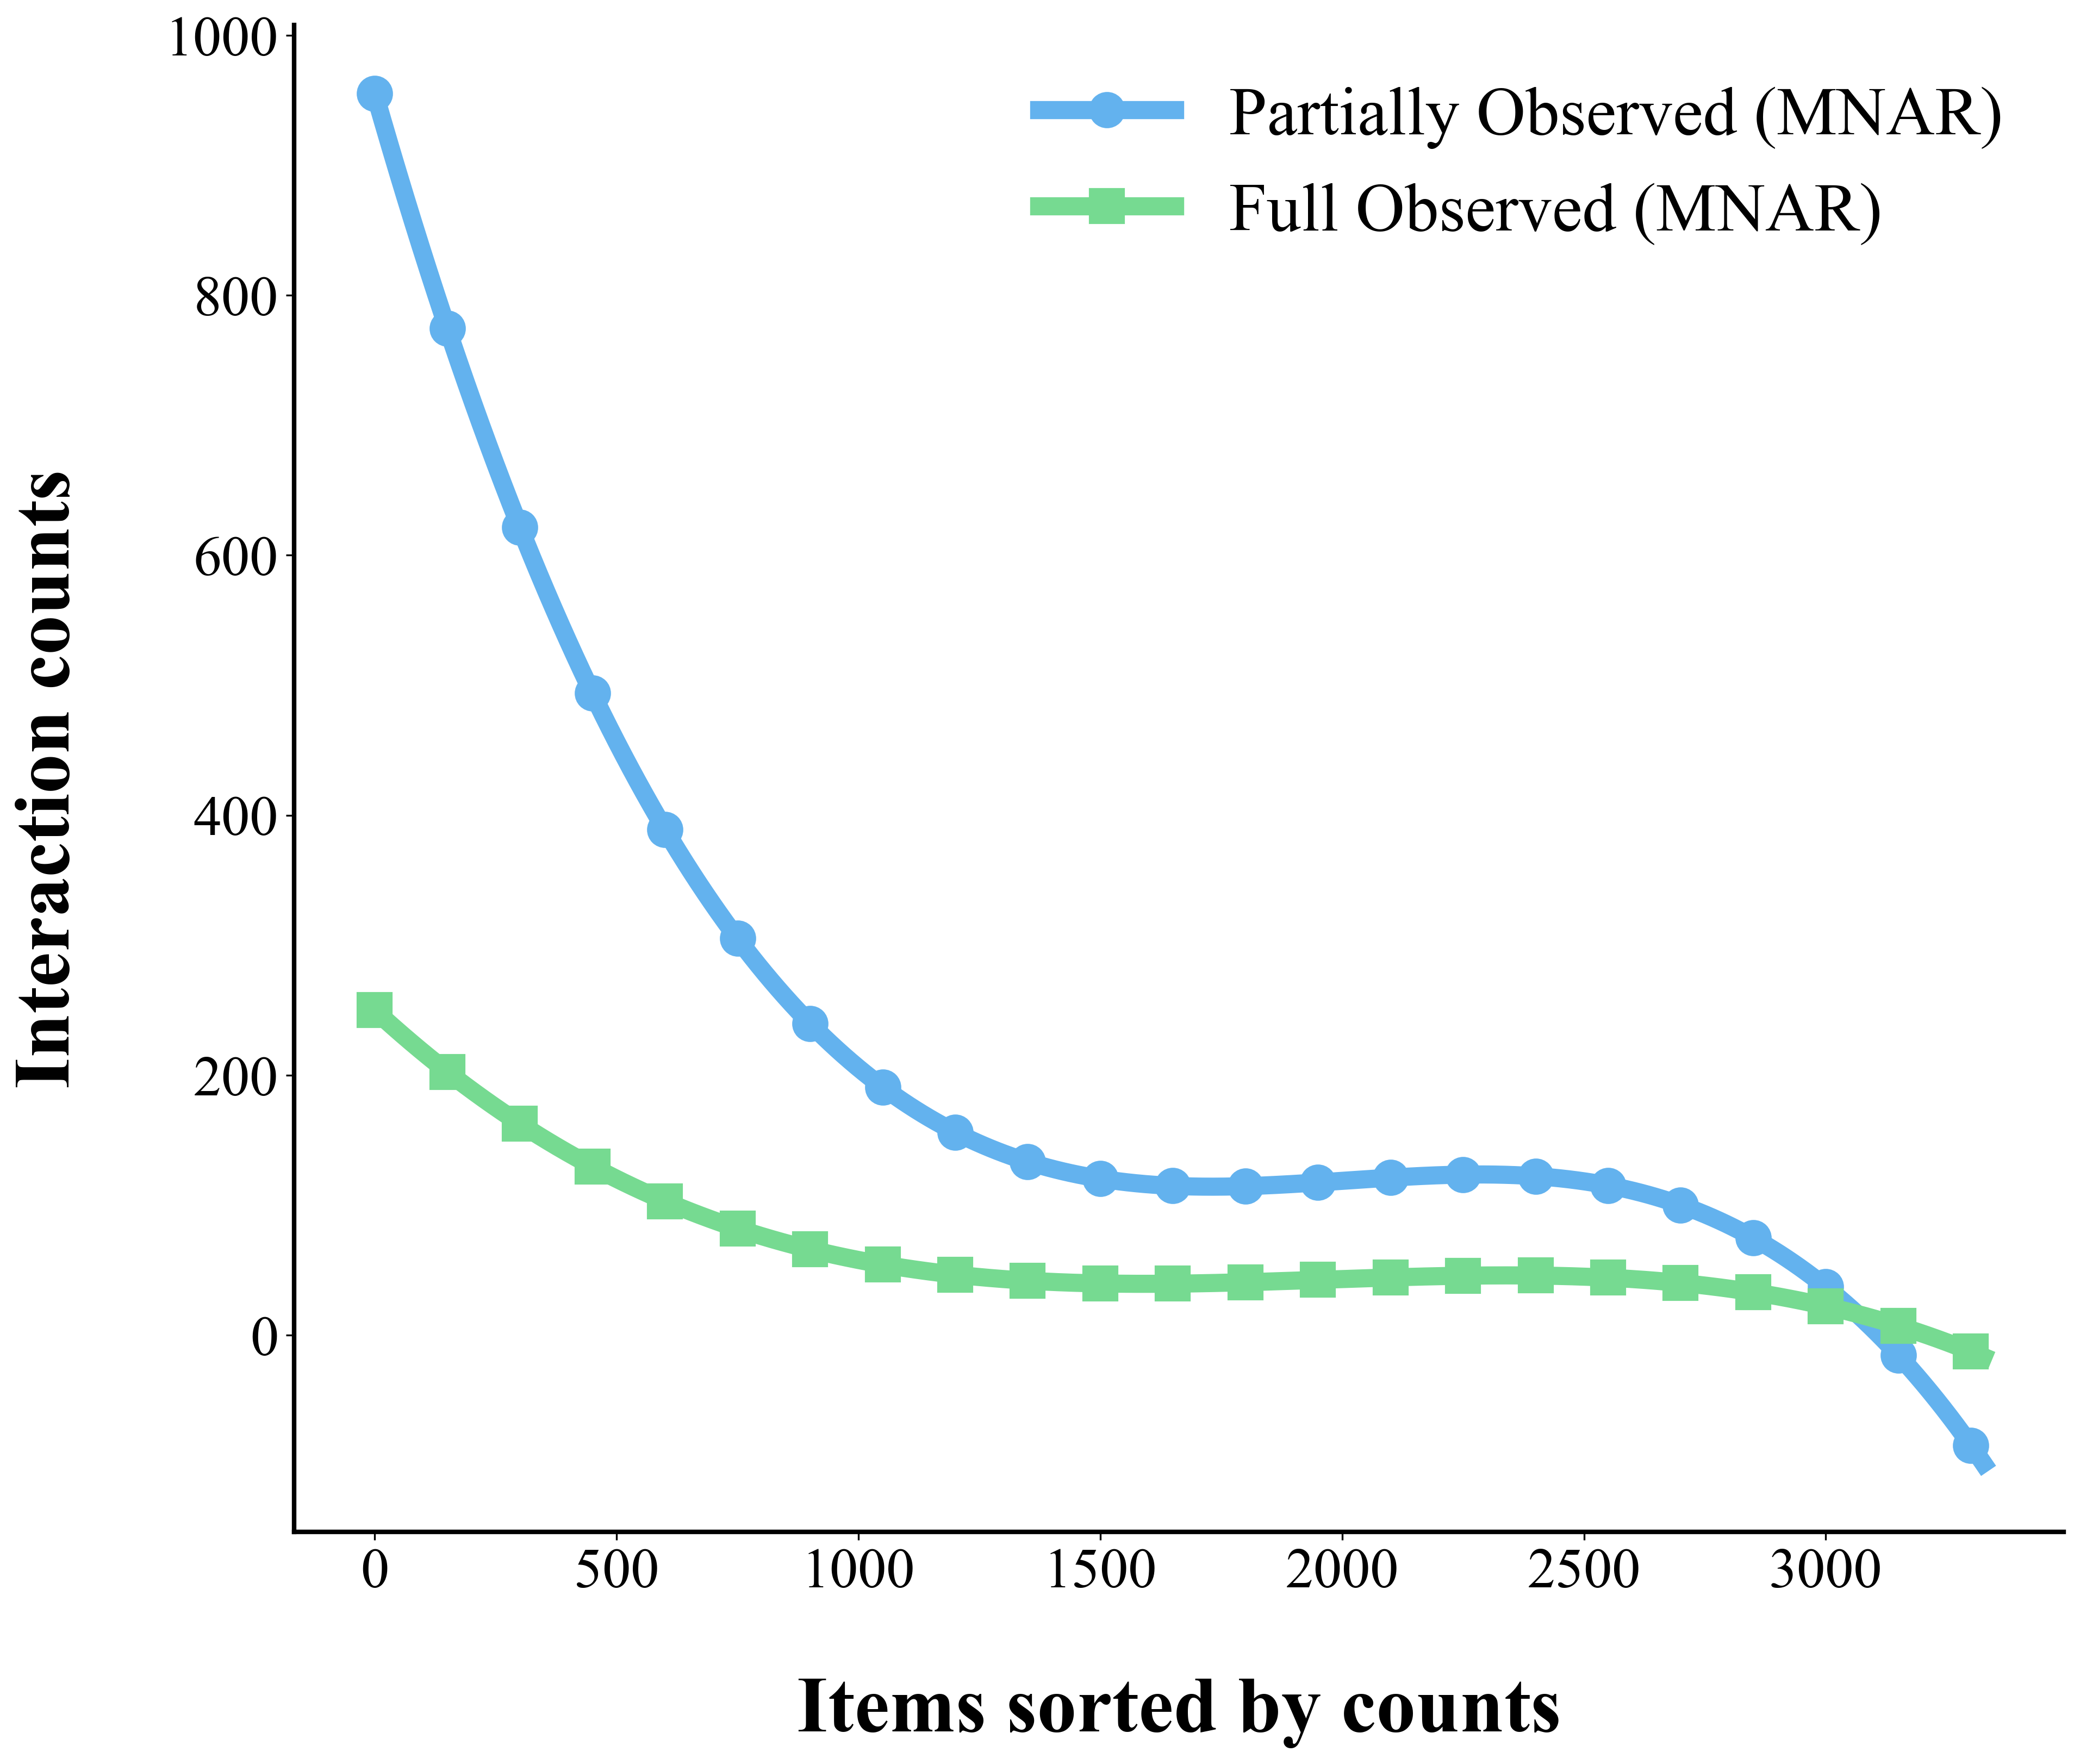

In [20]:
items = small.video_id.unique()
big = big[big['video_id'].isin(items)]
print(big.shape)
data =np.hstack(( big.groupby('video_id').watch_ratio.sum().to_numpy().reshape(-1,1),small.groupby('video_id').watch_ratio.sum().to_numpy().reshape(-1,1)))
data = data[np.argsort(-data[:,0])]
plot(data[:,0],data[:,1],data.shape[0])

In [6]:
small = small[small['watch_ratio'] > 0]
print(small.shape)

(217229, 3)


In [18]:
big = big[big['watch_ratio'] > 0]
print(big.shape)

(936568, 3)


In [11]:
small.columns = ['user','item','ratio']
big.columns = ['user','item','ratio']
print(small.head())
print(big.head())

    user  item  ratio
2     14  3649    1.0
12    14  6787    1.0
13    14  1951    1.0
27    14   206    1.0
35    14   217    1.0
    user  item  ratio
7      0  6812    1.0
11     0  5274    1.0
12     0   179    1.0
17     0   171    1.0
23     0   211    1.0


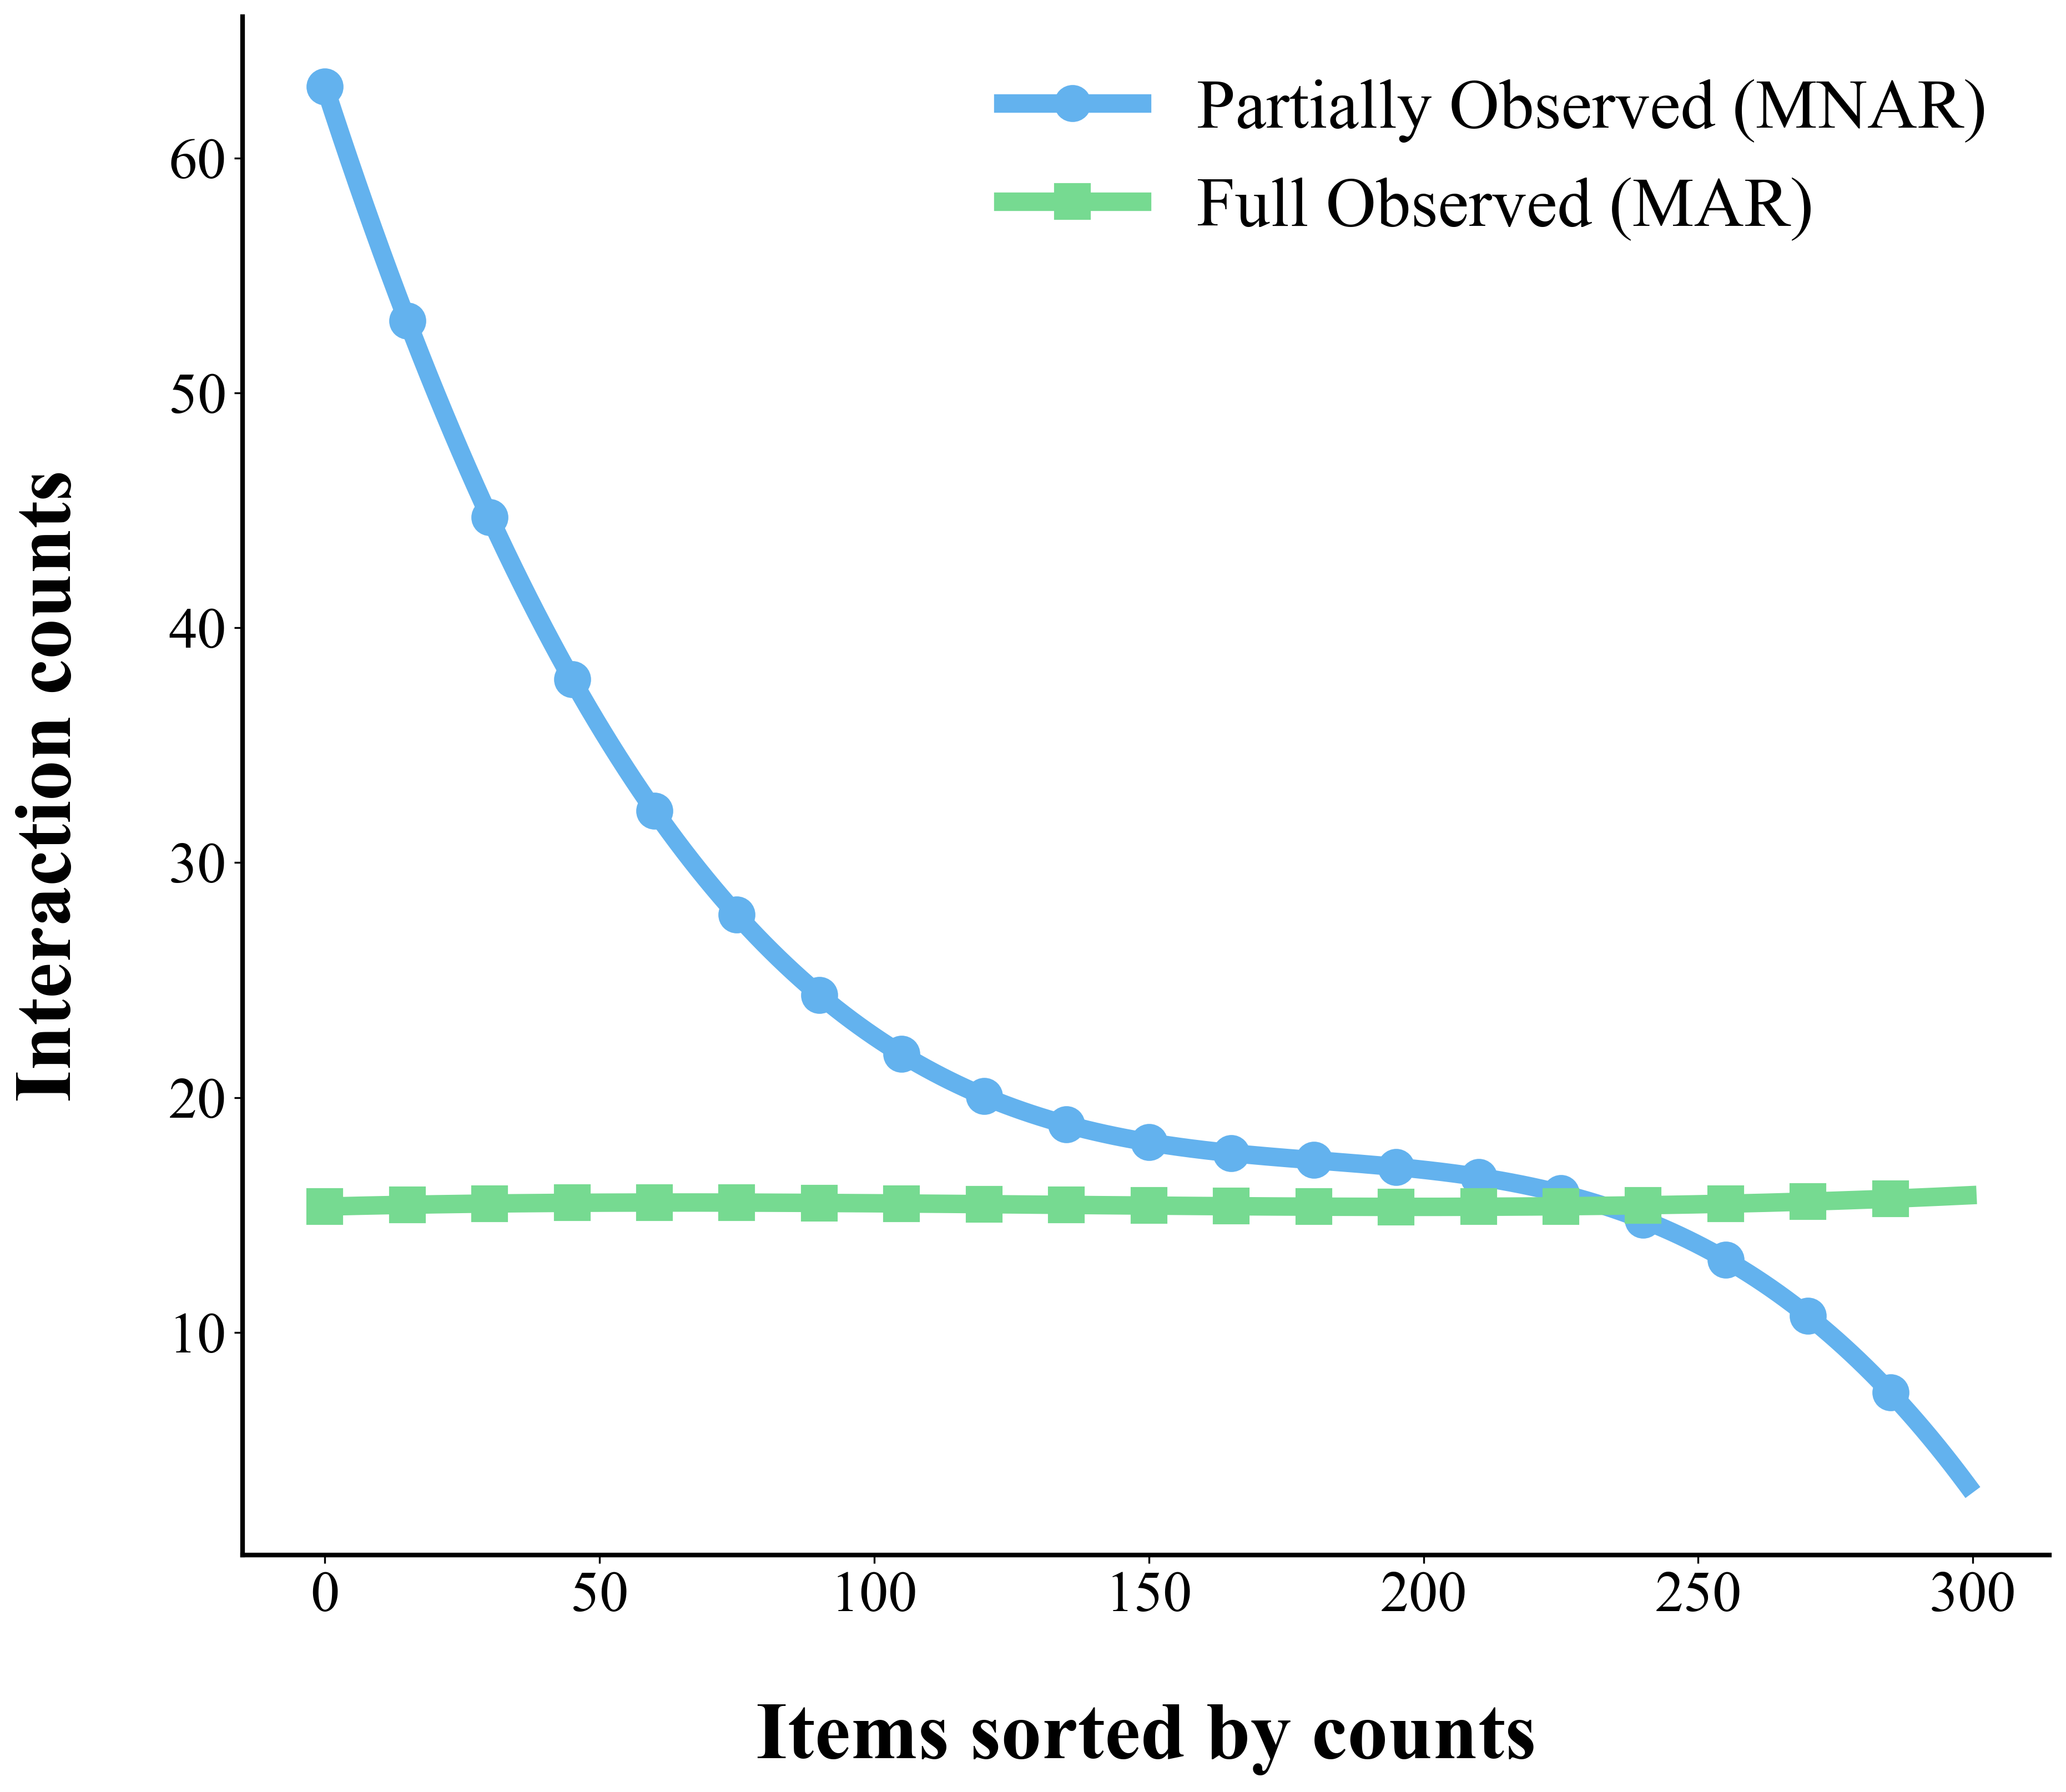

In [9]:
# Coat
train = pd.read_pickle('coat/train.pkl',compression = 'gzip')
test = pd.read_pickle('coat/test.pkl',compression = 'gzip')
data = np.hstack((train.groupby('item').user.count().to_numpy().reshape(-1,1),test.groupby('item').user.count().to_numpy().reshape(-1,1)))
data = data[np.argsort(-data[:,0])]
plot(data[:,0],data[:,1],data.shape[0])

In [8]:
def dataInfo(train,test):
    print(f'trainset shape is {train.shape},testset shape is {test.shape}, user num is {train.user.max()}, item num is {train.item.max()}, total interactions is {train.shape[0]}, sparsity is {1- (train.shape[0] + test.shape[0]) / (train.user.max() * train.item.max())}')

def binaryProcess(data,column = 'rating',threshold = 4):
    # data = data.copy(deep= True)
    data[column].iloc[data[column] < threshold] = 0
    data[column].iloc[data[column] >= threshold] = 1
    return  data


def saveData(train,test,dataset = 'ml-100k',compression = 'gzip'):
    train.to_pickle(savePath + '/'+ dataset +'/train.pkl',compression= compression)
    test.to_pickle(savePath + '/'+ dataset +'/test.pkl',compression= compression)


def resetIndex(data,column,order = ['user','item','rating']):
    items = pd.DataFrame(np.sort(data[column].unique()),columns=[column])
    items.reset_index(inplace= True)
    items.rename(columns= {'index':'b'}, inplace= True)
    data = pd.merge(data,items,on=[column],how= 'left')
    data.drop(columns=[column],inplace= True)
    data.rename(columns= {'b':column},inplace= True)
    return  data[order]

def data_process_1(x,test_percent):
    back = np.random.choice(x.index, int(len(x.item) * test_percent),replace = False)
    return back
def applyParallel(grouped,func,type = 1):
    res = Parallel(n_jobs= -1,verbose= 0,backend= 'threading',timeout= 10)(delayed(func)(group) for name,group in grouped)
    return np.concatenate(res).tolist()

def train_test_split(data,test_percent = 0.2):
    group = data.groupby('user')
    data_process = partial(data_process_1,test_percent = test_percent)
    sample = applyParallel(group,data_process)
    test = data.loc[sample]
    test = pd.DataFrame(test,columns=['user','item','rating'])
    train = pd.DataFrame(data.loc[list(set(data.index.values) - set(sample))],columns=['user','item','rating'])
    print(f'data shape is {data.shape}, after split , the train shape is {train.shape}, test shape is {test.shape}')
    return  train,test

def drop_untrain_items(train,test):
    train_item_unique = train.item.unique()
    drop_items = []
    count = 0
    for i in test.item.unique():
        if i not in train_item_unique:
            drop_items.append(i)
    print(drop_items)
    # print(test.shape)
    for i in drop_items:
        drop_index = test[test.item == i].index.tolist()
        test.drop(index= drop_index ,axis=0,inplace= True)
        count += len(drop_index)
    print(f'need drop {len(drop_items)} item, total drop {count} rows in test')
    return  test

In [12]:
small = drop_untrain_items(big,small)

[7115]
need drop 1 item, total drop 116 rows in test


In [13]:
print(big.item.max())
items = np.sort(big.item.unique().reshape(-1,1),axis= 0)
items = pd.DataFrame(items)
items = items.reset_index()
items.columns = ['items','item']
items

10727


,items,item
0,0,0
1,1,1
2,2,2
3,3,3
4,4,5
...,...,...
10606,10606,10723
10607,10607,10724
10608,10608,10725
10609,10609,10726


In [14]:
big = pd.merge(big,items,on=['item'],how= 'left')
big.drop(columns=['item'],inplace= True)
big.rename(columns= {'items':'item'},inplace= True)

In [15]:
small = pd.merge(small, items, on=['item'], how='left')
small.drop(columns=['item'], inplace=True)
small.rename(columns={'items': 'item'}, inplace=True)

In [18]:
small = small[['user','item','ratio']]
big = big[['user','item','ratio']]
print(small.head())
print(big.head())

   user  item  ratio
0    14  3623    1.0
1    14  6726    1.0
2    14  1936    1.0
3    14   203    1.0
4    14   214    1.0
   user  item  ratio
0     0  6751    1.0
1     0  5229    1.0
2     0   177    1.0
3     0   169    1.0
4     0   208    1.0


In [19]:
saveData(big,small,'kuai')

In [53]:
#lastfm

data = pd.read_csv(path + '/hetrec2011-lastfm-2k/user_taggedartists-timestamps.dat',sep='\t')
data.columns =[ 'user','item','rating','timestamp']
data.drop(columns=['timestamp'],inplace= True)
data['rating'] = data.rating.apply(lambda x: 1)
data = resetIndex(data,'user')
data = resetIndex(data,'item')
train,test = train_test_split(data)
test = drop_untrain_items(train,test)
#
dataInfo(train,test)
saveData(train,test,dataset='lastfm')

data shape is (186479, 3), after split , the train shape is (149959, 3), test shape is (36520, 3)
[566, 6369, 1151, 5300, 5938, 8921, 1974, 1447, 8495, 7362, 12434, 12428, 11088, 1976, 11466, 2138, 11899, 8840, 7393, 2227, 2478, 2608, 2615, 2830, 9878, 3405, 4097, 3660, 4552, 3498, 5157, 9856, 3707, 2241, 11326, 9492, 2531, 4310, 5691, 11390, 2711, 11383, 5305, 5917, 3878, 7988, 4353, 9863, 7049, 5266, 4307, 4380, 8949, 4584, 3238, 12176, 5102, 4357, 7992, 5126, 5200, 9463, 5251, 6563, 5269, 8239, 8429, 9111, 5650, 8295, 5877, 986, 5997, 2102, 1442, 11850, 8395, 11469, 1743, 10643, 9244, 6212, 4905, 9543, 3240, 9836, 5443, 6227, 7065, 3386, 10194, 7917, 11190, 9810, 9898, 6782, 6345, 7698, 6458, 6462, 4418, 10223, 5432, 10158, 6890, 6945, 6572, 10852, 2351, 7176, 11360, 9455, 3091, 5788, 6705, 7581, 9535, 7443, 1460, 7500, 7753, 7801, 9105, 8147, 8075, 8074, 8130, 8132, 10690, 10454, 8139, 6595, 11342, 7655, 5329, 8266, 7883, 1913, 9742, 8270, 5601, 11960, 11954, 9814, 3211, 11830, 556

In [12]:
#epinions
data=[]
with open('epinions.json','r',encoding='utf-8') as f:
    for line in f:
        data.append((json.loads(line.replace("'",'"').replace('\\','\\\\'))))
data=pd.DataFrame(data)[['userId','itemId','stars']]
data.rename({'userId':'user','itemId':'item','stars':'rating'})
data = resetIndex(data,'userId',order= ['userId','itemId','stars'])
data = resetIndex(data,'itemId',order= ['userId','itemId','stars'])
data.rename(columns={'userId':'user','itemId':'item','stars':'rating'},inplace= True)

In [17]:
train,test = train_test_split(data)

[array([], dtype=int64), array([29592], dtype=int64), array([303], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([21353], dtype=int64), array([30486], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([29970, 20321, 20100,  7682, 33091, 29425,  1610, 20510, 29439,
       21209], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([9237], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([  148, 28638, 28421], dtype=int64), array([], dtype=int64), array([], dtype=int

AttributeError: 'list' object has no attribute 'reset_index'

In [4]:
#ml-20m
data = pd.read_csv(path + '/ml-20m/ratings.csv',sep='::',names= [ 'user','item','rating','timestamp'],engine='python')
data.drop(columns=['timestamp'],inplace= True)
data = binaryProcess(data)
data = resetIndex(data,'user')
data = resetIndex(data,'item')
train,test = train_test_split(data)
test = drop_untrain_items(train,test)
test = test[test.rating > 0]
dataInfo(train,test)
saveData(train,test,dataset='ml-20m')

C:\Users\PC\AppData\Local\Temp\ipykernel_3668\3323495173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].iloc[data[column] < threshold] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_3668\3323495173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].iloc[data[column] >= threshold] = 1


In [333]:
#ml-10m
data = pd.read_csv(path + '/ml-10m/ml-10M100K/ratings.dat',sep='::',names= [ 'user','item','rating','timestamp'],engine='python')
data.drop(columns=['timestamp'],inplace= True)
data = binaryProcess(data)
data = resetIndex(data,'user')
data = resetIndex(data,'item')
train,test = train_test_split(data)
test = drop_untrain_items(train,test)
test = test[test.rating > 0]
dataInfo(train,test)
saveData(train,test,dataset='ml-10m')

C:\Users\PC\AppData\Local\Temp\ipykernel_14120\2612873942.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].iloc[data[column] < threshold] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_14120\2612873942.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].iloc[data[column] >= threshold] = 1
100%|██████████| 69878/69878 [13:07<00:00, 88.77it/s] 


data shape is (10000054, 1), after split , the train shape is (1973323, 3), test shape is (1973323, 3)
[]
need drop 0 item, total drop 0 rows in test
trainset shape is (1973323, 3),testset shape is (987257, 3), user num is 69877.0, item num is 10676.0, total interactions is 1973323, sparsity is 0.9960314305531338


In [182]:
#ml-1m
data = pd.read_csv(path + '/ml-1m/ratings.dat',sep='::',names= [ 'user','item','rating','timestamp'],engine='python')
data.drop(columns=['timestamp'],inplace= True)
data.user = data.user.apply(lambda x: x - 1)
data = binaryProcess(data)
data = resetIndex(data,'item')
train,test = train_test_split(data)
test = drop_untrain_items(train,test)
test = test[test.rating > 0]
dataInfo(train,test)
saveData(train,test,dataset='ml-1m')

6040it [01:21, 74.03it/s]


data shape is (1000209, 3), after split , the train shape is (802553, 3), test shape is (197656, 3)
[1078, 636, 1448, 2360, 2989, 3308, 1042, 803, 3086, 3506, 1858, 3071, 125, 747, 1735, 1652, 3536, 1576, 3013, 3146, 1221, 671, 133, 3089, 1688, 2498, 3367]
need drop 27 item, total drop 32 rows in test
trainset shape is (802553, 3),testset shape is (113775, 3), user num is 6039, item num is 3705, total interactions is 802553, sparsity is 0.9590458689682159


In [4]:
#ml-100k
train = pd.read_csv(path + '/ml-100k/ua.base',sep='\t',names= [ 'user','item','rating','timestamp'])
train = binaryProcess(train,'rating',4)


test = pd.read_csv(path + '/ml-100k/ua.test',sep='\t',names= [ 'user','item','rating','timestamp'])
test = binaryProcess(test,'rating',4)

# print(test.shape)
test = drop_untrain_items(train,test)
train.user = train.user.apply(lambda x : x - 1)
train.item = train.item.apply(lambda x : x - 1)
test.user = test.user.apply(lambda x : x - 1)
test.item = test.item.apply(lambda x : x - 1)
train = train[['user','item','rating']]
test = test[['user','item','rating']]
test = test[test.rating > 0]

dataInfo(train,test)
saveData(train,test)

[1582, 1653]
need drop 2 item, total drop 2 rows in test
trainset shape is (90570, 3),testset shape is (5468, 3), user num is 942, item num is 1681, total interactions is 90570, sparsity is 0.9393508817797515


In [15]:
compression = 'gzip'

for name in ['coat','yahoo']:
    pd.read_csv(savePath + '/'+name+'/train.csv').to_pickle(savePath + '/'+ name +'/train.pkl',compression= compression)
    pd.read_csv(savePath + '/'+name+'/test.csv').to_pickle(savePath + '/'+ name +'/test.pkl',compression= compression)
for name in ['ml-100k','ml-1m','ml-10m']:
    pd.read_csv(savePath + '/'+name+'/train.csv',header=None).to_pickle(savePath + '/'+ name +'/train.pkl',compression= compression)
    pd.read_csv(savePath + '/'+name+'/test.csv',header=None).to_pickle(savePath + '/'+ name +'/test.pkl',compression= compression)

In [16]:
compression = 'gzip'
data = pd.read_pickle(savePath + '/ml-100k' + '/train.pkl',compression= compression)
data.columns = ['user','item','label']
data

,user,item,label
0,0,0,1
1,0,1,0
2,0,2,1
3,0,3,0
4,0,4,0
...,...,...,...
90565,942,1046,0
90566,942,1073,1
90567,942,1187,0
90568,942,1227,0


In [19]:
item_pool = set(data.item.unique())
interact_status = data.groupby('user')['item'].apply(set).reset_index().rename(columns={'item': 'interacted_items'})
interact_status

,user,interacted_items
0,0,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,1,"{0, 256, 257, 9, 268, 13, 271, 272, 273, 18, 2..."
2,2,"{257, 259, 263, 267, 270, 271, 287, 298, 299, ..."
3,3,"{257, 323, 357, 326, 327, 328, 358, 10, 299, 3..."
4,4,"{20, 23, 24, 28, 39, 41, 49, 61, 62, 65, 68, 6..."
...,...,...
938,938,"{256, 1027, 8, 265, 14, 273, 274, 404, 1022, 2..."
939,939,"{3, 515, 6, 7, 8, 520, 11, 526, 528, 548, 46, ..."
940,940,"{0, 293, 357, 454, 297, 299, 1006, 272, 918, 4..."
941,941,"{257, 130, 258, 513, 891, 134, 519, 264, 1027,..."


In [20]:
interact_status['negative_items'] = interact_status['interacted_items'].apply(lambda x: item_pool - x)
interact_status

,user,interacted_items,negative_items
0,0,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{19, 32, 60, 116, 154, 159, 170, 188, 201, 264..."
1,1,"{0, 256, 257, 9, 268, 13, 271, 272, 273, 18, 2...","{1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 1..."
2,2,"{257, 259, 263, 267, 270, 271, 287, 298, 299, ...","{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,3,"{257, 323, 357, 326, 327, 328, 358, 10, 299, 3...","{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,..."
4,4,"{20, 23, 24, 28, 39, 41, 49, 61, 62, 65, 68, 6...","{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
...,...,...,...
938,938,"{256, 1027, 8, 265, 14, 273, 274, 404, 1022, 2...","{0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15..."
939,939,"{3, 515, 6, 7, 8, 520, 11, 526, 528, 548, 46, ...","{0, 1, 2, 4, 5, 9, 10, 12, 13, 14, 15, 16, 17,..."
940,940,"{0, 293, 357, 454, 297, 299, 1006, 272, 918, 4...","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
941,941,"{257, 130, 258, 513, 891, 134, 519, 264, 1027,...","{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [21]:
interact_status['test_negative_samples'] = interact_status['negative_items'].apply( lambda x: np.random.choice(list(x), 49,replace = False))
# data = interact_status[['user', 'negative_items', 'test_negative_samples']]

In [22]:
interact_status

,user,interacted_items,negative_items,test_negative_samples
0,0,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{19, 32, 60, 116, 154, 159, 170, 188, 201, 264...","[1592, 1310, 1197, 325, 1289, 982, 1095, 1577,..."
1,1,"{0, 256, 257, 9, 268, 13, 271, 272, 273, 18, 2...","{1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 1...","[334, 1111, 951, 260, 1325, 1126, 787, 1606, 6..."
2,2,"{257, 259, 263, 267, 270, 271, 287, 298, 299, ...","{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1152, 376, 742, 1324, 1238, 1192, 1498, 987, ..."
3,3,"{257, 323, 357, 326, 327, 328, 358, 10, 299, 3...","{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[794, 1289, 841, 1211, 176, 262, 1158, 1197, 5..."
4,4,"{20, 23, 24, 28, 39, 41, 49, 61, 62, 65, 68, 6...","{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[712, 688, 1501, 647, 583, 898, 1628, 667, 147..."
...,...,...,...,...
938,938,"{256, 1027, 8, 265, 14, 273, 274, 404, 1022, 2...","{0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15...","[1593, 711, 1377, 299, 1348, 27, 694, 13, 399,..."
939,939,"{3, 515, 6, 7, 8, 520, 11, 526, 528, 548, 46, ...","{0, 1, 2, 4, 5, 9, 10, 12, 13, 14, 15, 16, 17,...","[1454, 541, 1577, 1192, 71, 52, 1115, 305, 104..."
940,940,"{0, 293, 357, 454, 297, 299, 1006, 272, 918, 4...","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1077, 1672, 106, 909, 146, 756, 348, 1011, 97..."
941,941,"{257, 130, 258, 513, 891, 134, 519, 264, 1027,...","{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[26, 650, 1485, 585, 848, 1099, 1431, 1385, 57..."


In [12]:
#coat

data = np.loadtxt(path + '/coat/train.ascii')
data

array([[0., 0., 0., ..., 0., 4., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [4., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
row,col = np.nonzero(data)
label = np.ones_like(row).reshape(-1,1)
train = np.hstack((row.reshape(-1,1),col.reshape(-1,1)))
train = np.hstack((train,label))
train = pd.DataFrame(train,columns= ['user','item','rating'])
row,col = np.nonzero(np.loadtxt(path + '/coat/test.ascii'))
label = np.ones_like(row).reshape(-1,1)
test = np.hstack((row.reshape(-1,1),col.reshape(-1,1)))
test = np.hstack((test,label))
test = pd.DataFrame(test,columns= ['user','item','rating'])
print(train.head())
print(test.head())
saveData(train,test,'coat')
# saveData(train,test,'coat')

   user  item  rating
0     0    72       1
1     0   136       1
2     0   150       1
3     0   171       1
4     0   188       1
   user  item  rating
0     0    12       1
1     0    17       1
2     0    74       1
3     0    78       1
4     0    92       1
